(2014.7.11~2024.7.16, 研报解读与分享)

近期工作：
1. 可转债研报的分析：了解了不同的可转债多因子模型
2. DTW算法的分析

### DTW择时策略

DTW(Dynamic time warping)，中文为**动态时间规整算法**，用于对比两个信号之间的相关性。

#### 1. **DTW和其他相似性算法的区别和优势是什么？**

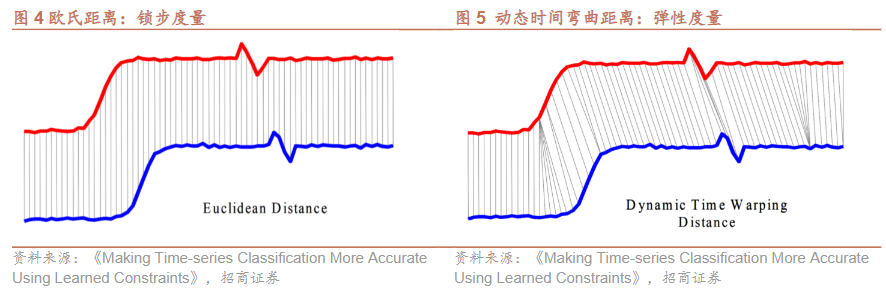

如图所示，左边是使用一对一的方式进行。这种方法的缺陷是如果两个信号有延迟，就会导致错配的问题。DTW算法解决了这个问题。

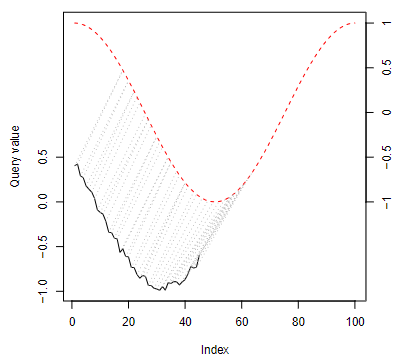

普通的相似性算法很多对序列的长度比较敏感，比如相关系数的计算，如果两个序列长度不同，会很大地影响准确度。而DTW算法可以很好地解决这个问题。

#### 2. **DTW的核心算法是什么？**

DTW的核心逻辑是使用动态规划的算法，通过扭曲时间轴，来实现两个时间序列的匹配。
- 算法简述如下：
1. 遍历两个序列A和B的每一个值，计算每一对值$ (i, j) $的累计值$ D(i, j) $，其中$ d(a_i, b_j) $是两个点之间的距离

$ A = \{a_1, a_2, \ldots, a_n\} $ and $ B = \{b_1, b_2, \ldots, b_m\} $

$ D(i, j) = d(a_i, b_j) + \min \begin{cases}
D(i-1, j) \\
D(i, j-1) \\
D(i-1, j-1)
\end{cases} $

2. 计算完成之后，就形成了如下的**Cost矩阵**，为了找出最优的匹配路径，我们使用动态规划算法，最终形成了红色的这一条线
3. 这一条线代表的是这两个序列之间最优的匹配方式，对应如右图所示
4. 为了比较不同序列之间的相关度，这里引出了一个DTW距离

$ DTW(X, Y) = \frac{\sum_{k=1}^T d(\phi_x(k), \phi_y(k))m_{\phi}(k)}{M_{\phi}} $

其中$\phi(𝑘)$ 是最短路径的匹配，$ m_{\phi}(k) $是权重， $ M_{\phi} $是标准化系数

$ \phi(𝑘)=(\phi_𝑥(𝑘),\phi_𝑦(𝑘)) $

$ \phi_𝑥(𝑘)\in {1,...,𝑁} $

$ \phi_𝑦(𝑘)\in {1,...,𝑀} $

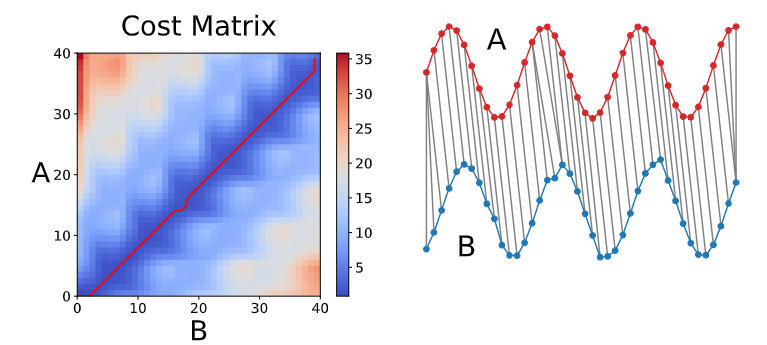

#### 3. **DTW的改进**

“病态匹配”问题：

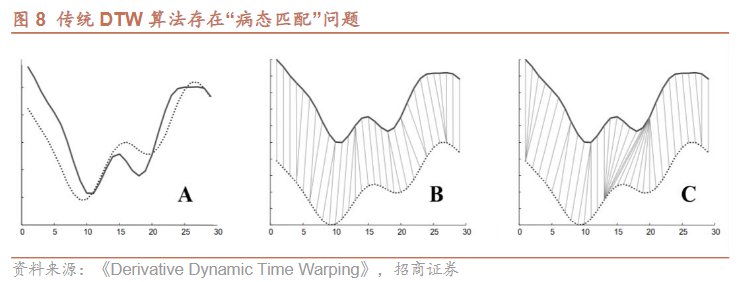

方法1：添加区域限制

**Sakoe-Chiba Constraint**和**Itakura Parallelogram**区域限制

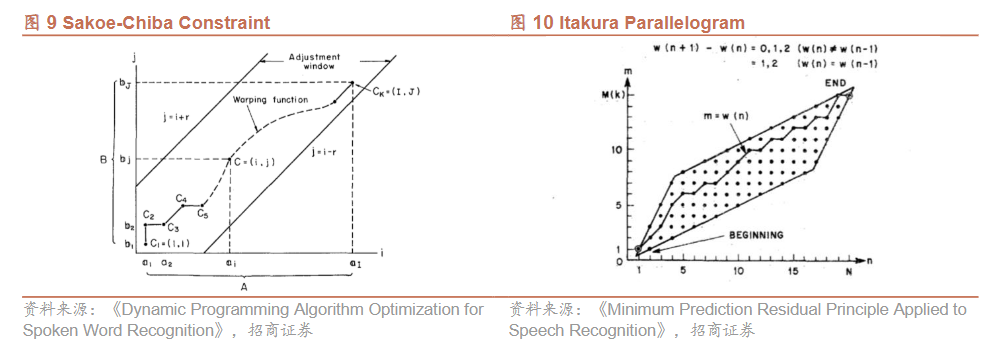

方法2：添加权重

回顾之前的DTW距离公式，我们可以对路径的每一步添加权重进行限制

$ DTW(X, Y) = \frac{\sum_{k=1}^T d(\phi_x(k), \phi_y(k))m_{\phi}(k)}{M_{\phi}} $

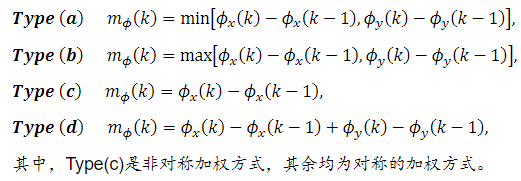

#### **4. 策略**

沪深300，选取指数收盘价和成交量，调仓周频。在调仓日，计算当上一段时间的收盘价和成交量与历史序列的DTW 离，筛选相似度较高（即DTW 距离较小）的部分历史序列，根据历史序列未来一周的加权平均涨跌幅（权重=1/DTW 距离）对未来一周行情做出预判，**即若历史序列未来加权平均涨跌幅>0，发出看多信号，反之，发出看空信号**。另外，若未筛选出相似的历史序列，则延续上一交易日的择时信号。 

*使用遍历法找出最佳的参数(l为序列长度，k为DTW距离阈值)*。

1. **传统DTW策略**
2. **基于区域的限制的DTW策略**
3. **基于添加权重的DTW策略**
   - 周频和日频
4. **引入宏观流动性指标的DTW策略**
   - 周频和日频
   - 沪深300股指期货
   - 其他宽基指数

> M1和M2（同比增速）的剪刀差反映货币供应量结构的变化，是能够把握市场拐点的一个宏观流动性指标。

可以基于M1 和M2 剪刀差的历史分位值构建择时策略：若剪刀差指标低于阈值，发出看多信号，反之发出看空信号。样本内测试结果显示当阈值为20%时，择时收益最高，故后面我们以20%作为判断市场底部的阈值对Ita-DTW择时策略进行优化。

#### **5.结论**

使用引入宏观流动性指标的、添加区域限制的DTW策略表现最好。

(2024.7.16~2024.8.22, 研报复现)